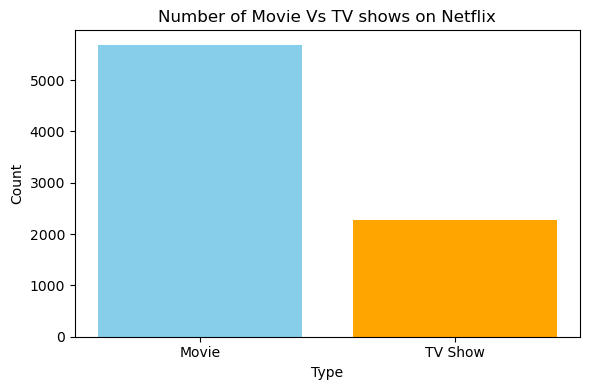

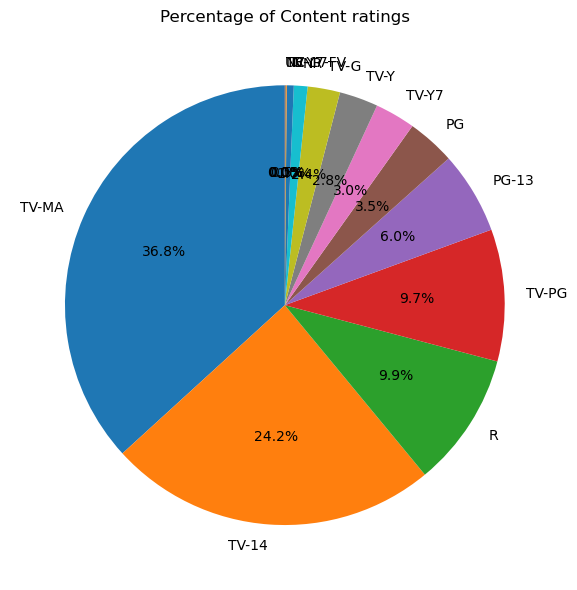

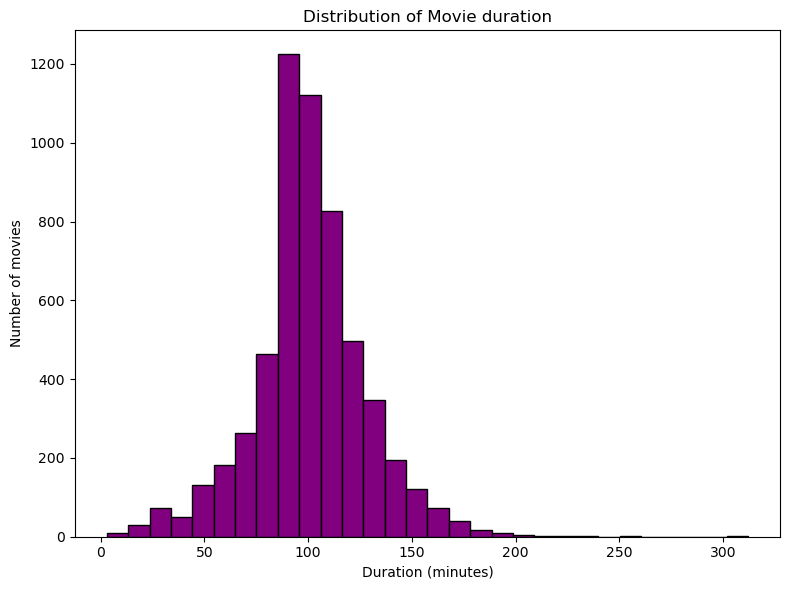

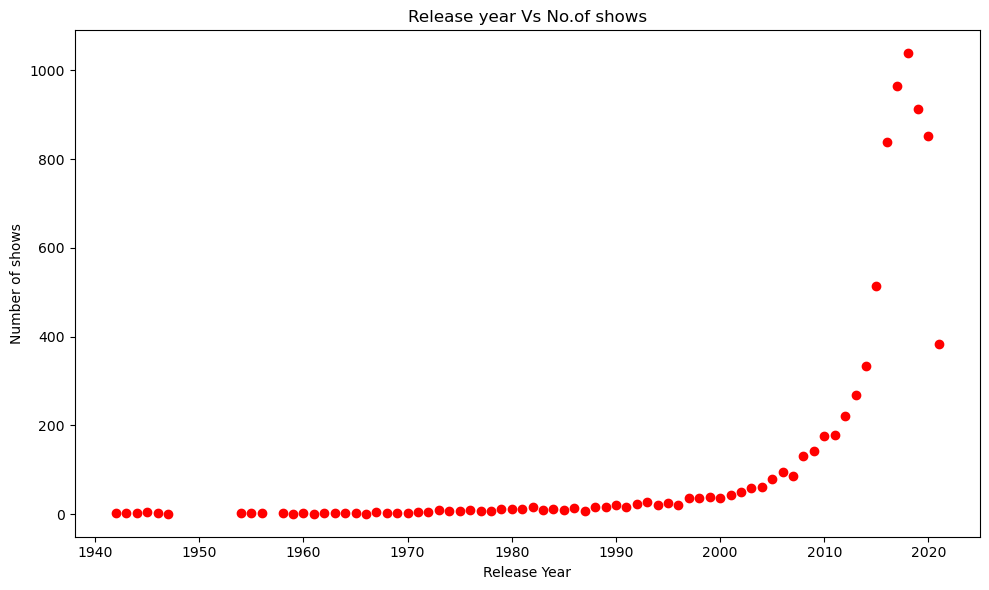

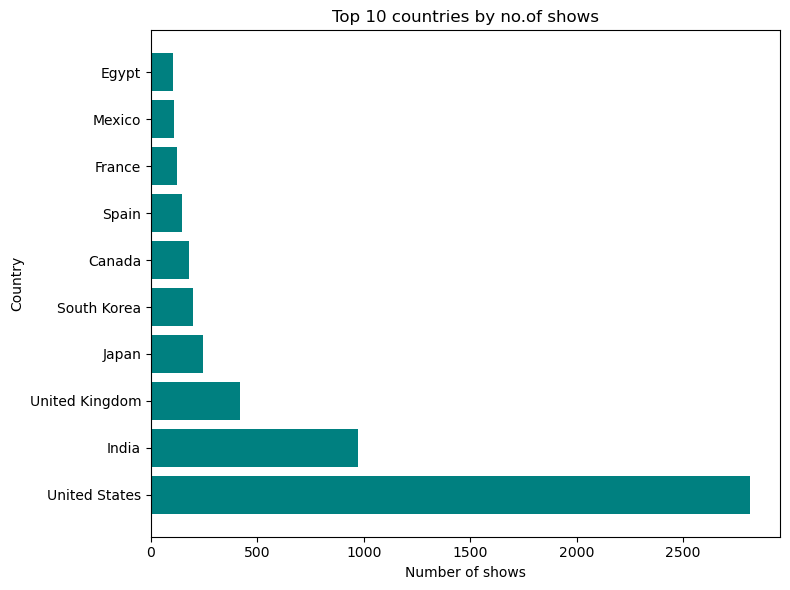

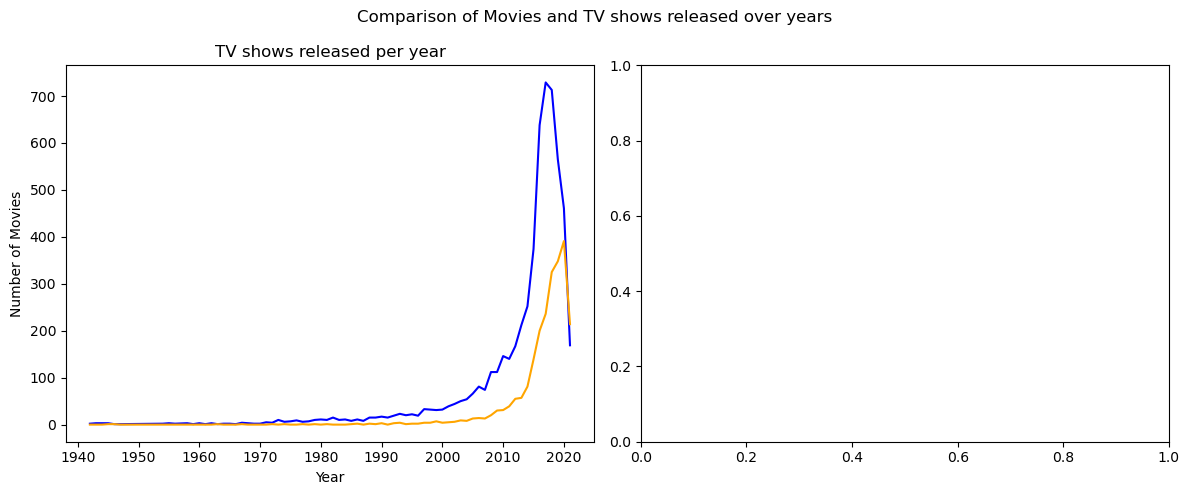

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("netflix_titles.csv")

df=df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index , type_counts.values, color=["skyblue","orange"])
plt.title("Number of Movie Vs TV shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('Movies_vs_tv_shows.png')
plt.show()



rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts , labels=rating_counts.index , autopct='%1.1f%%',startangle=90)
plt.title("Percentage of Content ratings")
plt.tight_layout()
plt.savefig('Piechart_ratings.png')
plt.show()


movie_df=df[df['type']=='Movie'].copy()
movie_df['duration_int']=movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of movies')
plt.tight_layout()
plt.savefig('hist_movie_duration.png')
plt.show()


release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values,color="red")
plt.xlabel("Release Year")
plt.ylabel("Number of shows")
plt.title("Release year Vs No.of shows")
plt.tight_layout()
plt.savefig('scatter_release_year.png')
plt.show()


country_counts= df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index ,country_counts.values, color="teal")
plt.title("Top 10 countries by no.of shows")
plt.xlabel("Number of shows")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("top_10_country.png")
plt.show()

content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax=plt.subplots(1,2,figsize=(12,5))

#first subplot :movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies released per year')
ax[0].set_xlabel("Year")
ax[0].set_ylabel('Number of Movies')

#second subplot :TV shows
ax[0].plot(content_by_year.index,content_by_year['TV Show'],color='orange')
ax[0].set_title('TV shows released per year')
ax[0].set_xlabel("Year")
ax[0].set_ylabel('Number of Movies')

fig.suptitle('Comparison of Movies and TV shows released over years')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()
